In [51]:
#Incluimos librerías para el trabajo con el modelo

#Librerías Base
import pandas as pd #trabajo con datos
from pandas import set_option
import numpy as np #para trabajo con numeros y matrices
import matplotlib as mpl
import matplotlib.pyplot as plt #para graficar


#Librerías para modelos
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split #separar automáticamente los datos en entrenamiento y validación
from sklearn.linear_model import LinearRegression #regresión lineal


In [52]:
#Cargamos los datos necesarios

dataset = pd.read_csv('20200110_EVALUACION_DOCENTE_2018_10052019_PUBL.csv',  sep=';')

In [53]:
#Revisamos de que tipo es cada variable del data set para ver si es necesario hacer transformaciones.
dataset.dtypes

AÑO_EVAL           int64
RBD                int64
DGV_RBD            int64
NOM_RBD           object
COD_REG_RBD        int64
COD_PRO_RBD        int64
COD_COM_RBD        int64
NOM_COM_RBD       object
COD_DEPROV_RBD     int64
NOM_DEPROV_RBD    object
COD_DEPE           int64
COD_DEPE2          int64
RURAL_RBD          int64
MRUN               int64
CLAVE             object
DOC_GENERO         int64
NIVEL              int64
SUBSECT           object
AE_PJE             int64
EP_PJE             int64
IRT_PJE            int64
PF_PJE            object
PF_ESC            object
INSTR_PJE         object
CCE_ESC           object
dtype: object

In [54]:
## En este paso eliminamos las columnas de tipo String para quedarnos solo con tipos numéricos. Ademas, eliminamos la variable AÑO_EVAL ya que en realidad es una constante (2018)
dataset = dataset.drop(["NOM_RBD", "NOM_COM_RBD", "NOM_DEPROV_RBD", "SUBSECT", "CCE_ESC", "CLAVE", "PF_ESC", "AÑO_EVAL"], axis=1)

In [55]:
#Vemos los datos
dataset.head(20)

,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,DOC_GENERO,NIVEL,AE_PJE,EP_PJE,IRT_PJE,PF_PJE,INSTR_PJE
0,1,9,15,151,15101,151,2,1,0,11446464,1,7,4,3,3,"2,23","2,64"
1,1,9,15,151,15101,151,2,1,0,13462227,1,6,4,3,4,"2,4","2,84"
2,1,9,15,151,15101,151,2,1,0,20874422,2,4,4,3,3,"2,58","2,85"
3,1,9,15,151,15101,151,2,1,0,23212113,1,7,4,3,2,"2,52","2,71"
4,1,9,15,151,15101,151,2,1,0,396505,1,4,4,2,3,"1,8","2,18"
5,1,9,15,151,15101,151,2,1,0,11297873,1,6,3,2,3,"1,8","2,08"
6,2,7,15,151,15101,151,2,1,0,9605059,2,1,4,3,4,"2,25","2,75"
7,2,7,15,151,15101,151,2,1,0,9617801,2,1,3,3,4,"2,05","2,53"
8,4,3,15,151,15101,151,2,1,0,17666027,2,4,4,3,3,"2,2","2,62"
9,4,3,15,151,15101,151,2,1,0,15814500,2,4,4,3,3,"2,2","2,62"


In [56]:
# Vemos que la variable a predecir (INSTR_PJE) es de tipo object, deberemos transformala a tipo numerico (float)
dataset.dtypes

RBD                int64
DGV_RBD            int64
COD_REG_RBD        int64
COD_PRO_RBD        int64
COD_COM_RBD        int64
COD_DEPROV_RBD     int64
COD_DEPE           int64
COD_DEPE2          int64
RURAL_RBD          int64
MRUN               int64
DOC_GENERO         int64
NIVEL              int64
AE_PJE             int64
EP_PJE             int64
IRT_PJE            int64
PF_PJE            object
INSTR_PJE         object
dtype: object

In [57]:
#Esta funcion toma un valor y sustituye la "," por "." y retorna un valor de tipo float
def convert_value(val):
    new_val = val.replace(',','.')
    return float(new_val)

In [58]:
#Esta funcion recorre un array que contiene los nombres de las columnas del dataframe que queremos convertir en type float y le aplica el metodo anterior (convert_value)
def update_dataFrame(_dataset, _columNames):
  for column in _columNames:
    _dataset[column] = _dataset[column].apply(convert_value)


In [59]:
#Es necesario transformar el data set las variables "INSTR_PJE" y "PF_PJE" debido a que los decimales estan como "," 
#y para poder leer y utilizar la data los decimales deben ser separados por "." (valor numerico).
update_dataFrame(dataset, ['INSTR_PJE', 'PF_PJE'])

In [60]:
#Luego de aplicar la transformacion vemos que la variable a predecir "INSTR_PJE" ya no es de tipo object si no float. Al igual que la otra variable transformada (PF_PJE).
dataset.dtypes

RBD                 int64
DGV_RBD             int64
COD_REG_RBD         int64
COD_PRO_RBD         int64
COD_COM_RBD         int64
COD_DEPROV_RBD      int64
COD_DEPE            int64
COD_DEPE2           int64
RURAL_RBD           int64
MRUN                int64
DOC_GENERO          int64
NIVEL               int64
AE_PJE              int64
EP_PJE              int64
IRT_PJE             int64
PF_PJE            float64
INSTR_PJE         float64
dtype: object

In [61]:
# Eliminamos los valores -1 ya que no nos sirven para el modelo. Luego vemos la cantidad de filas totales antes y despues de la eliminacion de los valores -1.
#De esta forma nos aseguramos que la eliminación haya sido exitosa.

print('Antes eliminacion:' ,len(dataset.index))
dataset = dataset[dataset.INSTR_PJE != -1]
print('Despues eliminacion:' ,len(dataset.index))

Antes eliminacion: 22045
Despues eliminacion: 20233


In [62]:
#Revisamos si existen valores nulos
dataset.head(20)
for feature in dataset.columns:
  print('total nulos de ', feature, ' = ', dataset[feature].isna().sum())

#Vemos que en el set de datos no tenemos valores nulos.

total nulos de  RBD  =  0
total nulos de  DGV_RBD  =  0
total nulos de  COD_REG_RBD  =  0
total nulos de  COD_PRO_RBD  =  0
total nulos de  COD_COM_RBD  =  0
total nulos de  COD_DEPROV_RBD  =  0
total nulos de  COD_DEPE  =  0
total nulos de  COD_DEPE2  =  0
total nulos de  RURAL_RBD  =  0
total nulos de  MRUN  =  0
total nulos de  DOC_GENERO  =  0
total nulos de  NIVEL  =  0
total nulos de  AE_PJE  =  0
total nulos de  EP_PJE  =  0
total nulos de  IRT_PJE  =  0
total nulos de  PF_PJE  =  0
total nulos de  INSTR_PJE  =  0


In [63]:
# Realizamos la separación de los datos
X = dataset.iloc[:,dataset.columns!="INSTR_PJE"] 
y = dataset.loc[:,"INSTR_PJE"] 
print(X.shape, y.shape)

(20233, 16) (20233,)


In [64]:
#Realizamos una descripcion de nuestros datos.
dataset.describe()

,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,DOC_GENERO,NIVEL,AE_PJE,EP_PJE,IRT_PJE,PF_PJE,INSTR_PJE
count,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000,20233.000
mean,7178.231,4.458,8.591,88.112,8817.089,88.294,1.908,1.193,0.227,12518702.296,1.721,3.410,3.882,2.976,3.058,2.309,2.675
std,6432.095,2.895,3.610,35.889,3591.234,36.716,1.023,0.856,0.419,7274870.696,0.448,1.343,0.381,0.532,0.589,0.283,0.248
min,1.000,0.000,1.000,11.000,1101.000,11.000,1.000,1.000,0.000,1733.000,1.000,1.000,1.000,0.000,0.000,1.000,1.000
25%,2487.000,2.000,6.000,61.000,6105.000,61.000,1.000,1.000,0.000,6186324.000,1.000,3.000,4.000,3.000,3.000,2.150,2.530
50%,5570.000,4.000,8.000,83.000,8314.000,83.000,2.000,1.000,0.000,12544286.000,2.000,3.000,4.000,3.000,3.000,2.300,2.680
75%,9991.000,7.000,13.000,131.000,13106.000,132.000,2.000,1.000,0.000,18843944.000,2.000,4.000,4.000,3.000,3.000,2.500,2.830
max,40429.000,9.000,15.000,152.000,15202.000,151.000,6.000,5.000,1.000,25707106.000,2.000,7.000,4.000,4.000,4.000,3.480,3.590


In [65]:
set_option('display.width', 100)
set_option('precision', 2)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


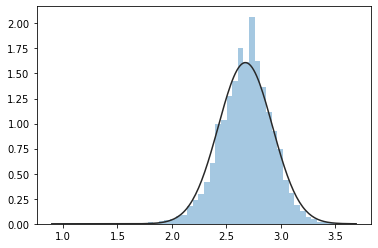

In [66]:
#Grafico de distribución para la variable Y
import seaborn as sns
import scipy.stats as st

sns.distplot(tuple(y), kde=False, fit=st.norm)

#Vemos que la distribución graficada se parece a la normal, por lo tanto es viable construir un modelo con los datos.

In [67]:
#Análisis de Correlación de Variables

#Con esta linea de codigo evitamos que los datos de correlación se muestren en notacion cientifica.
pd.set_option('display.float_format', lambda x: '%.3f' % x)

#Calculamos la correlación:
correlacion = dataset.corr()
correlacion.head(20)

,RBD,DGV_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,COD_DEPROV_RBD,COD_DEPE,COD_DEPE2,RURAL_RBD,MRUN,DOC_GENERO,NIVEL,AE_PJE,EP_PJE,IRT_PJE,PF_PJE,INSTR_PJE
RBD,1.000,0.014,0.463,0.463,0.463,0.465,-0.034,0.025,-0.145,-0.001,-0.022,0.067,-0.029,-0.020,-0.051,-0.029,-0.045
DGV_RBD,0.014,1.000,0.001,0.001,0.001,0.001,0.001,-0.005,0.028,-0.013,-0.010,-0.003,-0.001,0.009,0.006,-0.004,0.002
COD_REG_RBD,0.463,0.001,1.000,0.999,0.999,0.999,-0.085,-0.048,-0.044,-0.005,0.003,0.001,-0.007,-0.024,-0.031,0.017,-0.007
COD_PRO_RBD,0.463,0.001,0.999,1.000,1.000,0.999,-0.089,-0.053,-0.038,-0.006,0.004,0.001,-0.007,-0.024,-0.031,0.019,-0.006
COD_COM_RBD,0.463,0.001,0.999,1.000,1.000,0.999,-0.089,-0.053,-0.038,-0.006,0.004,0.001,-0.007,-0.024,-0.031,0.019,-0.006
COD_DEPROV_RBD,0.465,0.001,0.999,0.999,0.999,1.000,-0.087,-0.047,-0.048,-0.005,0.004,0.001,-0.007,-0.025,-0.032,0.018,-0.007
COD_DEPE,-0.034,0.001,-0.085,-0.089,-0.089,-0.087,1.000,0.900,0.016,0.012,-0.000,-0.012,0.003,0.004,-0.002,0.006,0.007
COD_DEPE2,0.025,-0.005,-0.048,-0.053,-0.053,-0.047,0.900,1.000,-0.055,0.010,-0.004,-0.006,-0.011,-0.023,-0.030,0.006,-0.014
RURAL_RBD,-0.145,0.028,-0.044,-0.038,-0.038,-0.048,0.016,-0.055,1.000,0.008,0.001,-0.144,-0.000,0.015,0.059,-0.024,0.006
MRUN,-0.001,-0.013,-0.005,-0.006,-0.006,-0.005,0.012,0.010,0.008,1.000,0.002,-0.001,0.006,0.000,0.002,0.000,0.002


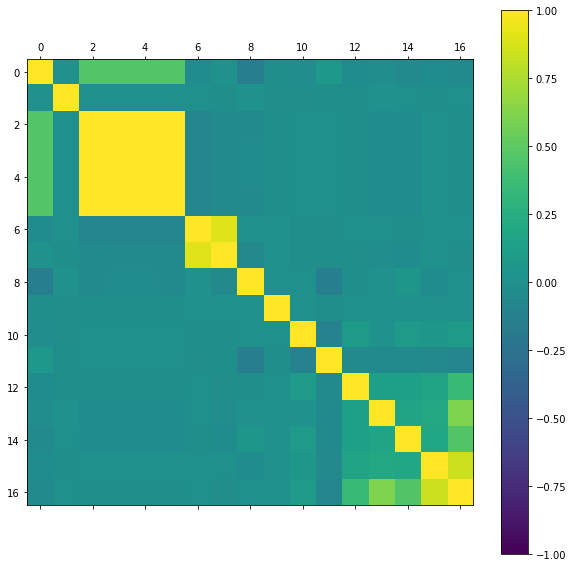

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlacion, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

#Las variables con correlaciones mas altas serán candidatas a ser eliminadas de nuestro modelo:
#Resumen correlaciones mas altas:
#COD_REG_RBD | COD_PRO_RBD -> 0,999
#COD_REG_RBD | COD_COM_RBD -> 0,999
#COD_REG_RBD | COD_DEPROV_RBD -> 0,999
#COD_PRO_RBD | COD_COM_RBD -> 1
#COD_PRO_RBD | COD_DEPROV_RBD -> 0,999
#COD_COM_RBD | COD_DEPROV_RBD -> 0,999

#Posibles variables a eliminar por tener correlaciones muy altas:
#COD_REG_RBD
#COD_PRO_RBD 
#COD_COM_RBD
#COD_DEPROV_RBD

#Vemos que las demas variables presentan un bajo nivel de correlación. Por este motivo son candidatas a pertenecer al modelo.

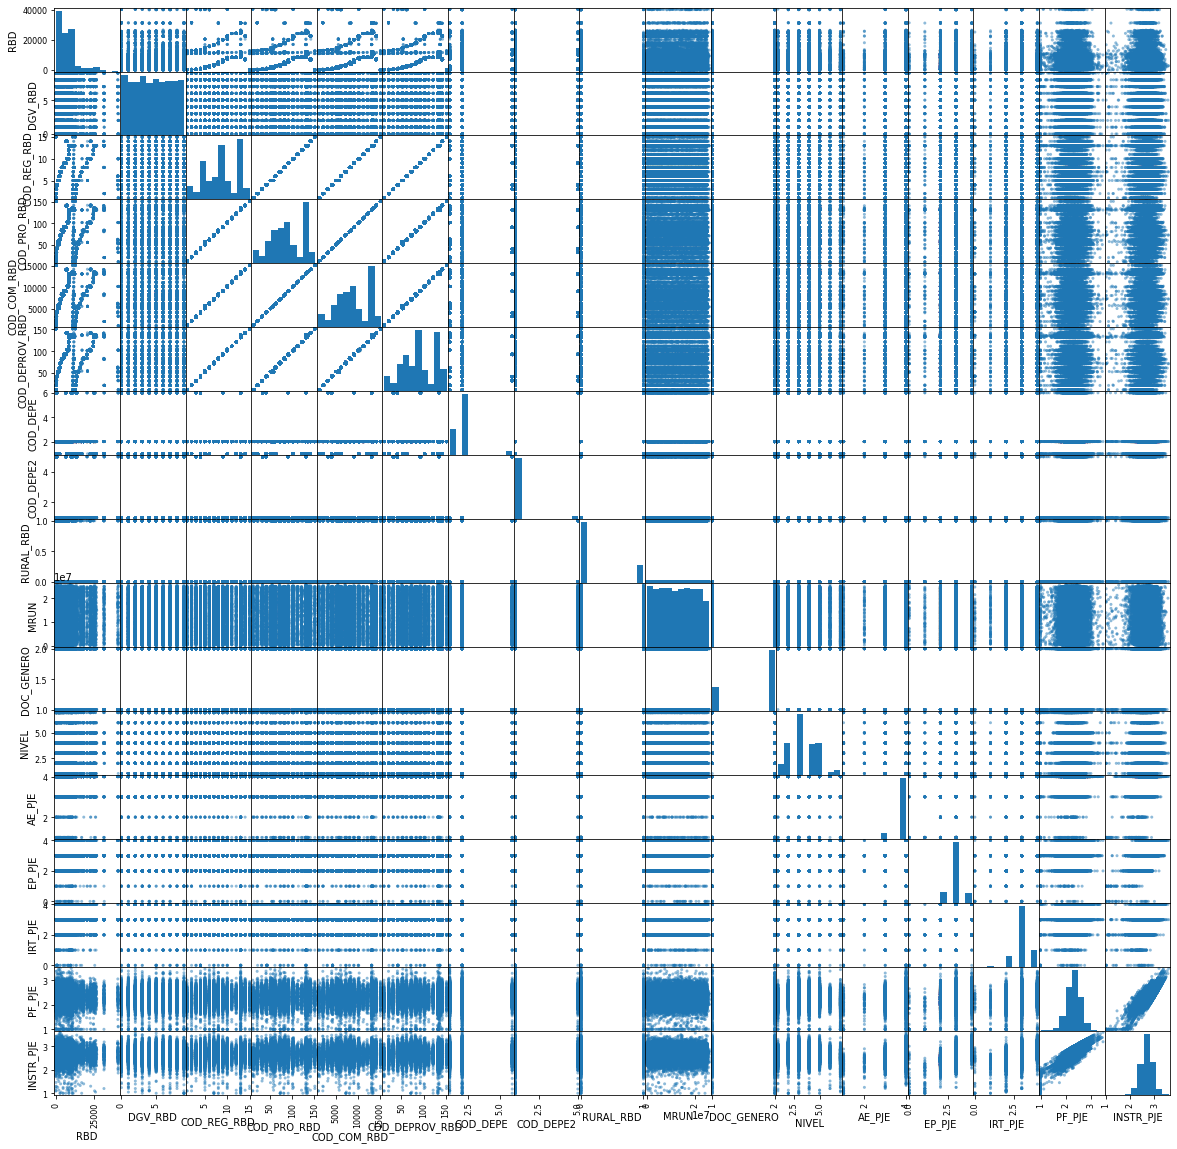

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(dataset, figsize=(20,20))
plt.show()

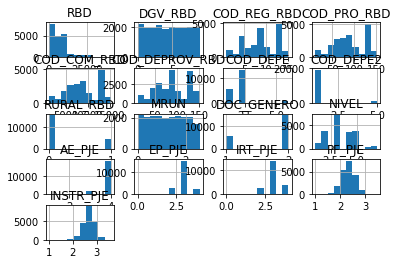

In [ ]:
#Graficos de distribución de los valores
dataset.hist()
plt.show()

<Figure size 1440x1440 with 0 Axes>

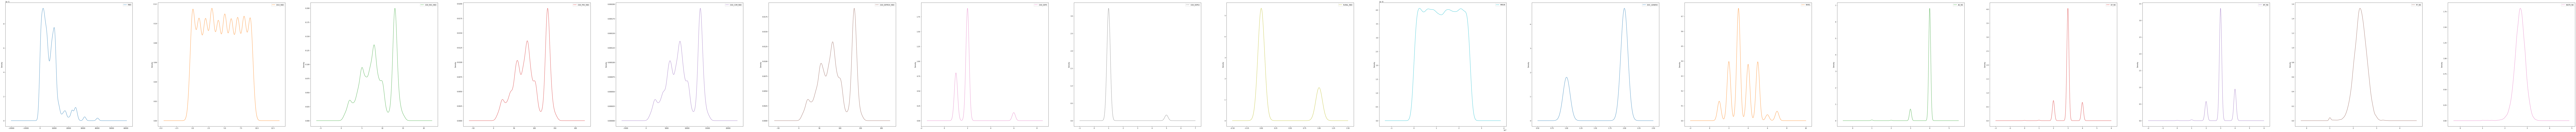

In [34]:
#graficos de densidad
plt.figure(figsize=(20,20))
dataset.plot(kind='density', subplots=True, layout=(17,17), sharex=False, figsize=(300,300) )
plt.show()

In [68]:
#SESGO (SKEW): Esto nos sirve para saber que variables tienen mucho sesgo. Estas serian nuevas candidatas a ser eliminadas de nuestro modelo.
skew = dataset.skew()
skew.head(20)

#RBD               1.827 -> Variable candidata a eliminacion
#DGV_RBD           0.013
#COD_REG_RBD      -0.073 
#COD_PRO_RBD      -0.087
#COD_COM_RBD      -0.088
#COD_DEPROV_RBD   -0.064
#COD_DEPE          2.884 -> Variable candidata a eliminación
#COD_DEPE2         4.222 -> Variable candidata a eliminación
#RURAL_RBD         1.302 -> Variable candidata a eliminación
#MRUN              0.002
#DOC_GENERO       -0.986
#NIVEL             0.442
#AE_PJE           -4.036 -> Variable candidata a eliminación
#EP_PJE           -0.462
#IRT_PJE          -0.424
#PF_PJE           -0.495
#INSTR_PJE        -0.781


RBD               1.827
DGV_RBD           0.013
COD_REG_RBD      -0.073
COD_PRO_RBD      -0.087
COD_COM_RBD      -0.088
COD_DEPROV_RBD   -0.064
COD_DEPE          2.884
COD_DEPE2         4.222
RURAL_RBD         1.302
MRUN              0.002
DOC_GENERO       -0.986
NIVEL             0.442
AE_PJE           -4.036
EP_PJE           -0.462
IRT_PJE          -0.424
PF_PJE           -0.495
INSTR_PJE        -0.781
dtype: float64

In [69]:
#Separamos datos en entrenamiento y Validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)

In [70]:
#Vemos que:
  #Para el caso del X se establecieron 16.186 datos para entrenamiento y 4047 datos para test
  #Para el caso del y se establecieron 16.186 datos para entrenamiento y 4047 datos para test
print("X: ", X.shape, "X_train:", X_train.shape, "X_test:", X_test.shape, "y:", y.shape, "y_train:", y_train.shape, "y_test:", y_test.shape)

X:  (20233, 16) X_train: (16186, 16) X_test: (4047, 16) y: (20233,) y_train: (16186,) y_test: (4047,)


In [71]:
#Realizamos el escalamiento. De esta forma llevamos nuestros datos a una escala equivalente.
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

In [ ]:
#selección de características
  #reducir el sobre-entrenmaiento (overfitting)
  #mejorar el accuracy (accuracy = rendimiento del modelo o nivel de predicción)
  #reducir el tiempo de entrenamiento (reducir la cantidad de variables que requiere mi modelo para poder funcionar)

In [72]:
#Seleccion univariada
#Test estadístico puede ser usado para seleccionar las características que tienen una relación fuerte con la variable a predecir
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

test = SelectKBest(score_func=f_classif, k=16)
set_printoptions(precision=3)
fit = test.fit(X_train, y_train)
print(fit.scores_)
print("RBD	DGV_RBD	COD_REG_RBD	COD_PRO_RBD	COD_COM_RBD	COD_DEPROV_RBD	COD_DEPE	COD_DEPE2	RURAL_RBD	MRUN	DOC_GENERO	NIVEL	AE_PJE	EP_PJE	IRT_PJE	PF_PJE")

#Recapitulando, hasta ahora las variables candidatas a ser eliminadas luego de realizado los analisis de Correlación y de Sesgo son las siguientes:
#COD_REG_RBD (Tras analisis de correlacion)
#COD_PRO_RBD (Tras analisis de correlacion)
#COD_COM_RBD (Tras analisis de correlacion)
#COD_DEPROV_RBD (Tras analisis de correlacion)
#RBD (Tras analisis de sesgo)
#COD_DEPE (Tras analisis de sesgo)         
#COD_DEPE2 (Tras analisis de sesgo)         
#RURAL_RBD (Tras analisis de sesgo)
##AE_PJE (Tras analisis de sesgo)

#Luego de realizada el test de seleccion univariada podemos ver as variables que tienen los
#valores más altos y que por lo tanto tienen una relación fuerte con la variable a predecir. Estas son:
#PF_PJE -> 213.892
#IRT_PJE -> 28.847
#EP_PJE -> 58.35
#AE_PJE -> 22.962 -> Ya no es candidata a ser eliminada.

#Vemos que la variable AE_PJE era candidata a ser eliminada tras el analisis de sesgo. Sin embargo, al realizar el análisis de selección univariada vemos que esta variable
#tiene una relación fuerte con la variable a predecir. Por este motivo la mantendremos como variable en nuestro modelo.

[  1.268   0.897   1.197   1.189   1.189   1.198   1.127   1.17    1.048
   1.159   1.829   1.95   22.962  58.35   28.847 213.892]
RBD	DGV_RBD	COD_REG_RBD	COD_PRO_RBD	COD_COM_RBD	COD_DEPROV_RBD	COD_DEPE	COD_DEPE2	RURAL_RBD	MRUN	DOC_GENERO	NIVEL	AE_PJE	EP_PJE	IRT_PJE	PF_PJE


In [74]:
#Eliminación de características recursivas (RFE)
#Remueve recursivamente atributos y construye un modelo con los atributos restantes, usa el accuracy delmodelo para identificar cuales atributos quedan.
from sklearn.feature_selection import RFE

#Usaremos regresión lineal ya que nuestros datos son de tipo numérico.
model = LinearRegression()
rfe = RFE(model, 1)
fit = rfe.fit(X_train, y_train)
print("Num Features: %d" % fit.n_features_)
print("selected features:", fit.support_)
print("Feature ranking:", fit.ranking_)
print("RBD	DGV_RBD	COD_REG_RBD	COD_PRO_RBD	COD_COM_RBD	COD_DEPROV_RBD	COD_DEPE	COD_DEPE2	RURAL_RBD	MRUN	DOC_GENERO	NIVEL	AE_PJE	EP_PJE	IRT_PJE	PF_PJE")

#Podemos ver que hay consistencia entre los dos modelos. En ambos se muestra que las 4 ultimas variables (AE_PJE, EP_PJE, IRT_PJE,	PF_PJE)
#son las mas importantes.

Num Features: 1
selected features: [False False False False False False False False False False False False
 False False False  True]
Feature ranking: [16 15  9  2  3 10  7  8 13 14 12 11  6  4  5  1]
RBD	DGV_RBD	COD_REG_RBD	COD_PRO_RBD	COD_COM_RBD	COD_DEPROV_RBD	COD_DEPE	COD_DEPE2	RURAL_RBD	MRUN	DOC_GENERO	NIVEL	AE_PJE	EP_PJE	IRT_PJE	PF_PJE


In [75]:
#Importancia de características
#Utilizaremos un modelo llamado "Random Forest" para estimar la importancia de las características.

from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)
for imp in model.feature_importances_:
  print("{:.8f}".format(float(imp)))

print("RBD	DGV_RBD	COD_REG_RBD	COD_PRO_RBD	COD_COM_RBD	COD_DEPROV_RBD	COD_DEPE	COD_DEPE2	RURAL_RBD	MRUN	DOC_GENERO	NIVEL	AE_PJE	EP_PJE	IRT_PJE	PF_PJE")

#Podemos ver que nuevamente, las 4 últimas variables analizadas (AE_PJE, EP_PJE, IRT_PJE,	PF_PJE) son las que obtienen mayor puntaje.

0.00098575
0.00052535
0.00023320
0.00033565
0.00049530
0.00035251
0.00010556
0.00003580
0.00013702
0.00140977
0.00016376
0.00050728
0.02351377
0.23249548
0.05774786
0.68095596
RBD	DGV_RBD	COD_REG_RBD	COD_PRO_RBD	COD_COM_RBD	COD_DEPROV_RBD	COD_DEPE	COD_DEPE2	RURAL_RBD	MRUN	DOC_GENERO	NIVEL	AE_PJE	EP_PJE	IRT_PJE	PF_PJE


In [76]:
#Definición del tipo de modelo que usaremos.
#Pondremos a competir varios tipos de modelos y veremos cual se ajusta mejor.

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor

modelos_nombres = ["LinearRegression", 
                   "RidgeCV", 
                   "LassoCV", 
                   "RadmonForest", 
                   "GBDT", 
                   "SVR", 
                   "ElasticNet", 
                   "XGBOOS"]
modelos_funct = [LinearRegression(),
                 RidgeCV(alphas=(0.001,0.01, 1), cv=3),
                 LassoCV(alphas=(0.001,0.01, 1), cv=5),
                 RandomForestRegressor(n_estimators=30),
                 SVR(),
                 ElasticNet(alpha=0.001, max_iter=1000),
                 XGBRegressor()
                 ]

In [77]:
#Usaremos R2 como medida para saber si el modelo fue entrenado correctamente. También llamado Coeficiente de Determinación
from sklearn.metrics import r2_score

#Definimos una función donde le pasaremos como parametros el modelo, los datos de entrenamiento y test de 'X' y los datos de entrenamiento y test de 'y'.
def R2(model, X_train, X_test, y_train, y_test):
  model_fitted = model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  score = r2_score(y_test, y_pred)
  return score

In [50]:
scores = []

for name, modelf in zip(modelos_nombres, modelos_funct):
  score = R2(modelf, X_train, X_test, y_train, y_test)
  print("{}: score {:.6f}".format(name, score.mean()))

#Podemos ver que la gran mayoría de los modelos tienen un gran nivel de predicción a excepción de GBDT que obtuvo un score negativo.
#Nos quedaremos con el modelo "ELASTICNET" ya que mostró un score de 0.996772, el más alto de todos.

#Este score de 0.996772 lo podemos interpretar de la siguiente manera: De cada 100 casos, 99 son predecidos correctamente.

LinearRegression: score 0.990981
RidgeCV: score 0.990981


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.9951e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.01222e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.97334e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=6.99659e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=7.01371e-17): result may not be accurate.
  overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlg

LassoCV: score 0.990645
RadmonForest: score 0.994244
GBDT: score -0.005388
SVR: score 0.990814
[00:04:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
ElasticNet: score 0.996772
